<a href="https://colab.research.google.com/github/ashwanthlonely/Learn/blob/main/ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#importing dependencies

from nltk.util import pr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import re
import nltk
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stopword = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Data Collection

In [6]:
#Data Loading in Pandas

data = pd.read_csv('/content/drive/MyDrive/dataset/senti file.csv')

In [7]:
#check first five rows
data.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [8]:
#last five rows
data.tail()

,Unnamed: 0,tweets,labels
219289,219289,Other Software Projects Are Now Trying to Repl...,bad
219290,219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,219291,chatgpt is being disassembled until it can onl...,bad
219292,219292,2023 predictions by #chatGPT. Nothing really s...,bad
219293,219293,"From ChatGPT, neat stuff https://t.co/qjjUF2Z2m0",neutral


In [10]:
#check shape
data.shape

(219294, 3)

In [11]:
#check more information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  219294 non-null  int64 
 1   tweets      219294 non-null  object
 2   labels      219294 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.0+ MB


In [12]:
#check missing values
data.isnull().sum()

Unnamed: 0    0
tweets        0
labels        0
dtype: int64

In [13]:
#check duplicated value in dataset
data.duplicated().sum()

0

In [14]:
#clean dataset

def clean(text):
  pattern = re.compile(r'\[.*?\]|https?://\s+|www\.\S+|[%s]|\n|\w+\d\w+')
  text = pattern.sub('', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = ' '.join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = ' '.join(text)
  return text

In [15]:
data['tweets'] = data['tweets'].apply(clean)

In [22]:
#dataset after cleaning
del data['Unnamed: 0']
data.head()

,tweets,labels
0,chatgpt: optim languag model dialogu http://t....,neutral
1,"tri talk chatgpt, new ai ytem optim dialogue. ...",good
2,chatgpt: optim languag model dialogu http://t....,neutral
3,"thrill hare chatgpt, new model optim dialog, p...",good
4,"a 2 minut ago, @openai relea new chatgpt. \n\n...",bad


In [23]:
#check value of labels

data['labels'].value_counts()

bad        107796
good        56011
neutral     55487
Name: labels, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='labels', ylabel='count'>

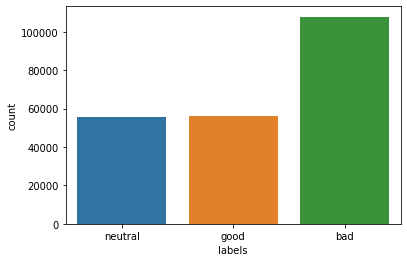

In [26]:
import seaborn as sns
sns.countplot(data['labels'])

<AxesSubplot:ylabel='labels'>

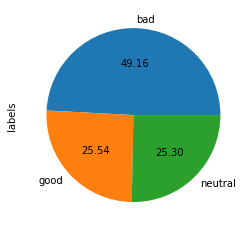

In [27]:
data['labels'].value_counts().plot(kind='pie', autopct='%.2f')

In [31]:
labels = data['labels'].value_counts()
numbers = labels.index
quantity = labels.values

import plotly.express as px
figure = px.pie(data,
                values=quantity,
                names=numbers,hole = 0.5)
figure.show()

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [33]:
!pip install wordcloud -q

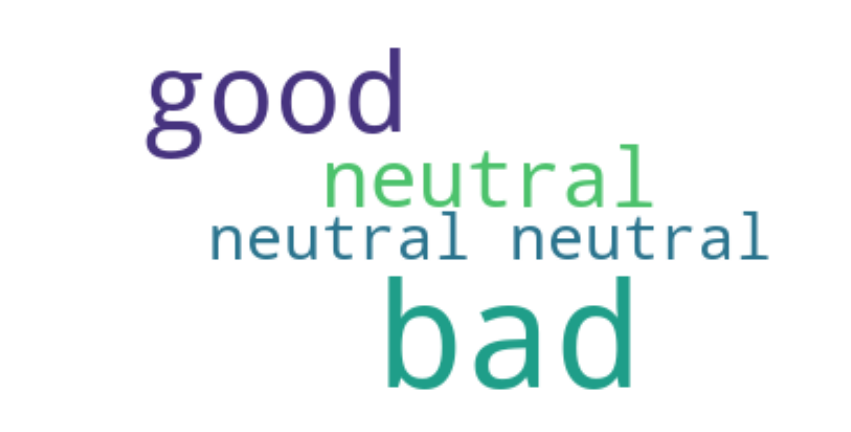

In [35]:
#The labels column of the data contains the labels given by every reviewer

text = ' '.join(i for i in data.labels)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
3plt.show()                    

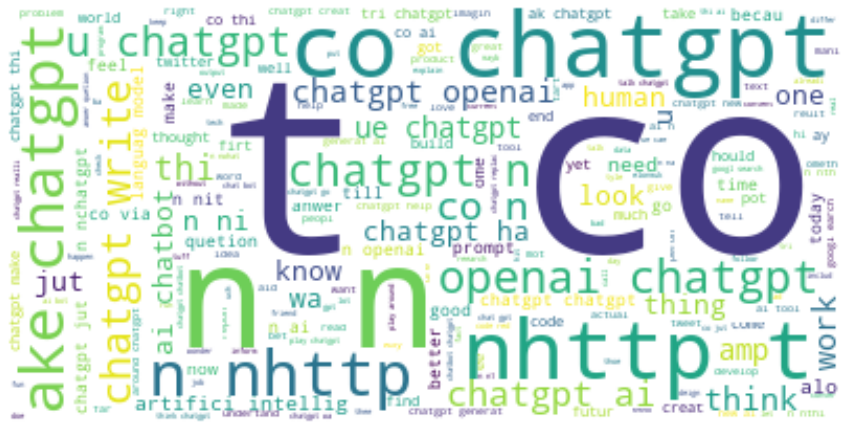

In [36]:
#The labels column of the data contains the labels given by every reviewer

text = ' '.join(i for i in data.tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()                    

In [37]:
#splitting the dataset
X = data['tweets']
Y = data['labels']

In [39]:
#loading Countvectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)

In [40]:
print(X)

  (0, 22293)	1
  (0, 85578)	1
  (0, 63407)	1
  (0, 71689)	1
  (0, 31229)	1
  (0, 51690)	1
  (0, 24370)	1
  (0, 85286)	1
  (1, 22293)	1
  (1, 85578)	1
  (1, 51690)	1
  (1, 24370)	1
  (1, 110146)	1
  (1, 105264)	1
  (1, 76614)	1
  (1, 9205)	1
  (1, 124712)	1
  (1, 31230)	1
  (1, 124424)	1
  (1, 40080)	1
  (1, 49489)	1
  (1, 54267)	1
  (1, 56518)	1
  (2, 22293)	1
  (2, 85578)	1
  :	:
  (219291, 31457)	1
  (219292, 22293)	1
  (219292, 51690)	1
  (219292, 24370)	1
  (219292, 59786)	1
  (219292, 96172)	1
  (219292, 107795)	1
  (219292, 87628)	1
  (219292, 123572)	1
  (219292, 12885)	1
  (219292, 84723)	1
  (219292, 35193)	1
  (219292, 29335)	1
  (219292, 88191)	1
  (219292, 110087)	1
  (219292, 109309)	1
  (219292, 80111)	1
  (219292, 91453)	1
  (219292, 81372)	1
  (219293, 22293)	1
  (219293, 51690)	1
  (219293, 24370)	1
  (219293, 110760)	1
  (219293, 42681)	1
  (219293, 75964)	1


In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)

In [42]:
print(Y)

[2 1 2 ... 0 0 2]


In [43]:
#splitting the dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

In [44]:
#check shape of X_train and X_test or Y_train
print(X_train.shape,X_test.shape,Y_train.shape)

(146926, 127700) (72368, 127700) (146926,)


In [46]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [47]:
from sklearn.metrics import accuracy_score
#training dataset accuracy score
train_test = lg.predict(X_train)
accuracy_score(train_test,Y_train)

0.8991465091270435

In [48]:
#test dataset accuracy score
test_data = lg.predict(X_test)
accuracy_score(test_data,Y_test)

0.8484413000221093

In [50]:
from sklearn.metrics import jaccard_score, accuracy_score, f1_score, classification_report
preds = lg.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     35518
           1       0.86      0.84      0.85     18508
           2       0.74      0.70      0.72     18342

    accuracy                           0.85     72368
   macro avg       0.83      0.82      0.83     72368
weighted avg       0.85      0.85      0.85     72368



In [53]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, Y_train)

MultinomialNB()

In [54]:
preds = nb.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     35518
           1       0.62      0.80      0.70     18508
           2       0.59      0.31      0.41     18342

    accuracy                           0.71     72368
   macro avg       0.67      0.66      0.65     72368
weighted avg       0.70      0.71      0.69     72368



In [55]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [56]:
# Hyperparameter tuning for Multinomial Naive Bayes model

param_grid = {"alpha": [0.1,0,1.0, 10, 100]}

grid_search = GridSearchCV(MultinomialNB(), param_grid, verbose=2)

grid_search.fit(X_train, Y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ............................................alpha=0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...........................................alpha=10; total time=   0.1s
[CV] END ...................

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0, 1.0, 10, 100]}, verbose=2)

In [57]:
grid_search.best_params_

{'alpha': 1.0}